У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/yulu_rental.csv')
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

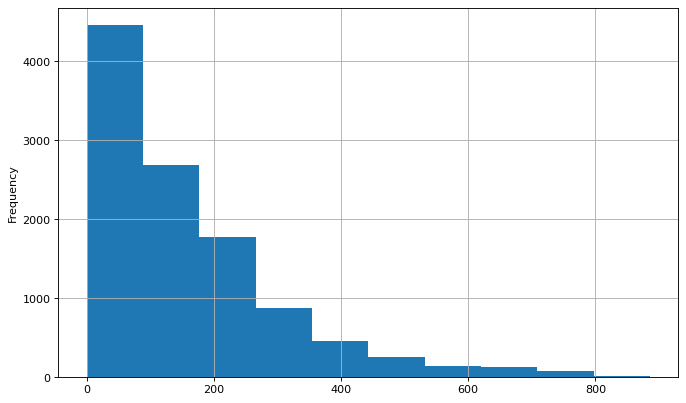

In [ ]:
plt.figure(figsize=(10,6), dpi=80)
df['registered'].plot(kind='hist')
plt.grid(True)

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

Text(0, 0.5, 'Кількість рядків в даніх')

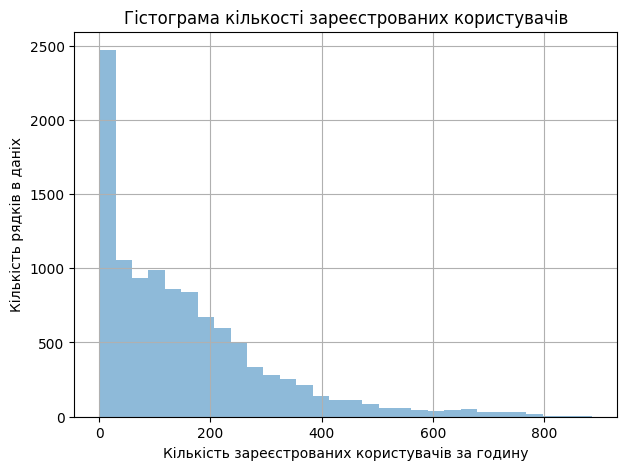

In [ ]:
plt.figure(figsize=(7, 5))

kwargs = dict(kind='hist', bins=30, alpha=0.5)

df['registered'].plot(**kwargs)
plt.grid(True)
plt.title('Гістограма кількості зареєстрованих користувачів')
plt.xlabel('Кількість зареєстрованих користувачів за годину')
plt.ylabel('Кількість рядків в даніх')

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [ ]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [ ]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [ ]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

In [ ]:
zero_registered_users = df[df['registered'] == 0]

zero_count_by_day = zero_registered_users.groupby('dayofweek').size()
zero_count_by_day



dayofweek
0    5
1    3
2    2
3    1
4    1
5    1
6    2
dtype: int64

([<matplotlib.axis.XTick at 0x7b5bb8745030>,
 [Text(0, 0, 'Понеділок'),
  Text(1, 0, 'Вівторок'),
  Text(2, 0, 'Середа'),
  Text(3, 0, 'Четвер'),
  Text(4, 0, 'П’ятниця'),
  Text(5, 0, 'Субота'),
  Text(6, 0, 'Неділя')])

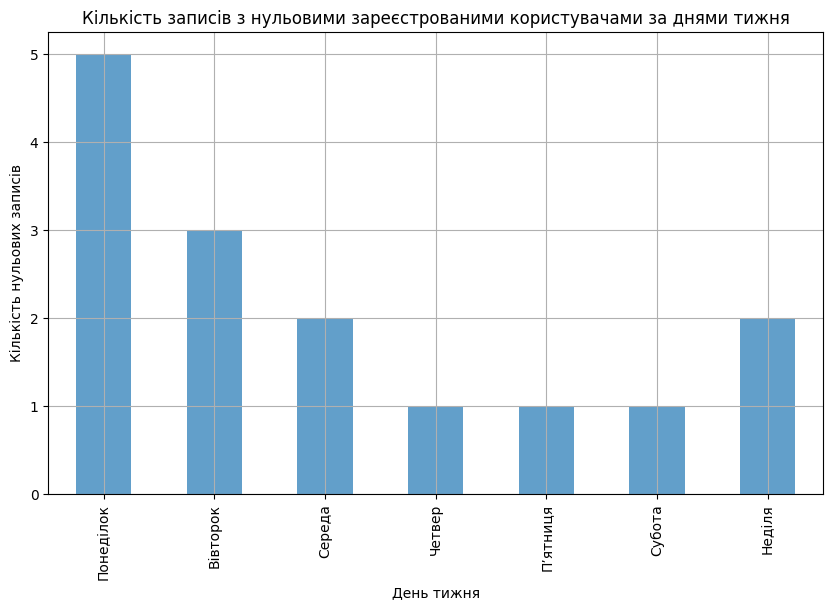

In [53]:
plt.figure(figsize=(10, 6))
zero_count_by_day.plot(kind='bar', alpha=0.7)
plt.grid(True)
plt.title('Кількість записів з нульовими зареєстрованими користувачами за днями тижня')
plt.xlabel('День тижня')
plt.ylabel('Кількість нульових записів')
plt.xticks(range(7), ['Понеділок', 'Вівторок', 'Середа', 'Четвер', 'П’ятниця', 'Субота', 'Неділя'])



Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)


3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

In [ ]:
sum_registered_by_weather = df.groupby('weather')['registered'].sum()
sum_registered_by_weather

weather
1    1186163
2     419914
3      87106
4        158
Name: registered, dtype: int64

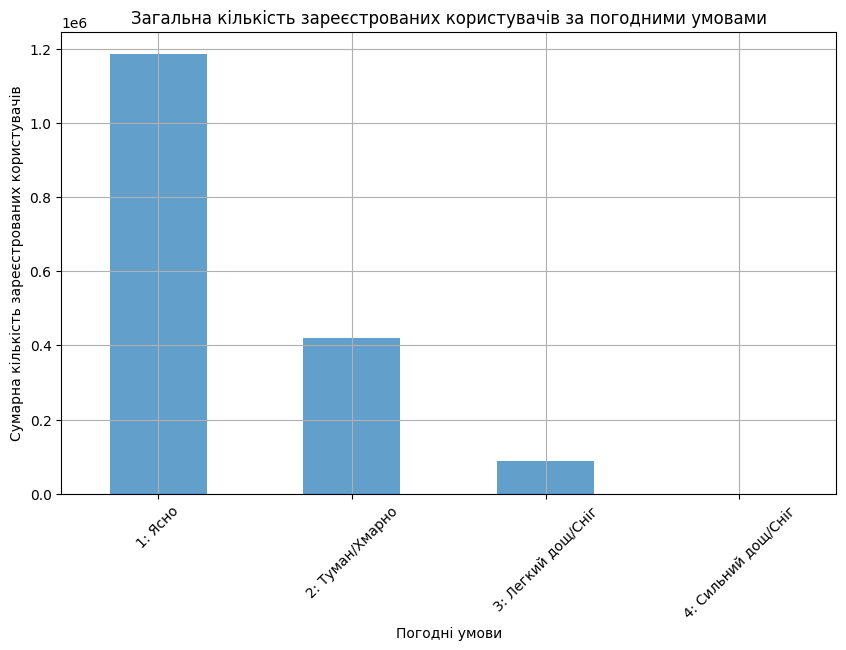

In [ ]:
sum_registered_by_weather.plot(kind='bar', figsize=(10,6), alpha=0.7)
plt.title('Загальна кількість зареєстрованих користувачів за погодними умовами')
plt.xlabel('Погодні умови')
plt.ylabel('Сумарна кількість зареєстрованих користувачів')
plt.xticks(ticks=range(len(sum_registered_by_weather)), labels=['1: Ясно', '2: Туман/Хмарно', '3: Легкий дощ/Сніг', '4: Сильний дощ/Сніг'], rotation=45)
plt.grid(True)


Сумарна кількість зареєстрованих користувачів зменшується з погіршенням погодних умов, як показано на графіку. Найбільша кількість користувачів спостерігається під час ясної погоди. З іншого боку, найменше користувачів використовують сервіс у найгірших погодних умовах, що теж є логічним. Це підтверджує, що візуалізація має логічний сенс і відображає реальну тенденцію використання сервісу в залежності від погоди.

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

<Axes: xlabel='humidity', ylabel='registered'>

<Figure size 1000x600 with 0 Axes>

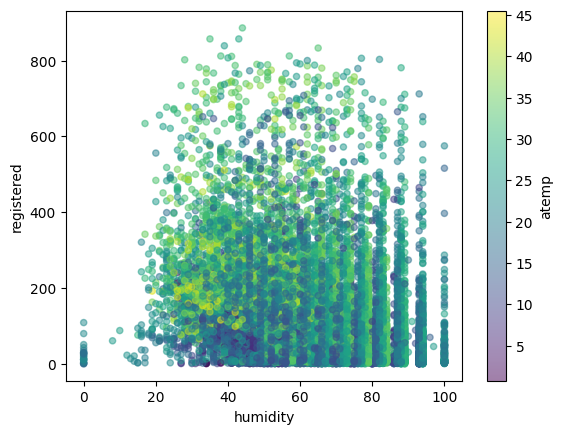

In [52]:
plt.figure(figsize=(10,6))
kwargs = dict(kind='scatter', alpha=0.5)
df.plot(x='humidity', y='registered', c='atemp', **kwargs)

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)

**Відповідь на питання**
З графіка можна зробити наступні спостереження:

1. **Відсутність чіткої тенденції**: Дані не показують явної кореляції між вологістю і кількістю зареєстрованих користувачів. Точки розсіяні досить рівномірно по осі вологості, особливо в середньому діапазоні.

2. **Широкий діапазон зареєстрованих користувачів**: При низьких і високих рівнях вологості спостерігається широкий діапазон кількості зареєстрованих користувачів, що свідчить про те, що інші чинники, окрім вологості, можуть суттєво впливати на кількість поїздок.

3. **Колірна шкала**: Колір точок варіюється від блакитного до жовтого, що відображає зміну відчуваної температури від низьких до високих значень. На графіку не спостерігається яскраво вираженої залежності між відчуваною температурою та кількістю зареєстрованих користувачів; проте здається, що при вищих відчуваних температурах кількість користувачів може бути трохи більшою.

4. **Зменшення кількості зареєстрованих користувачів при високій вологості**: При дуже високій вологості (близько 100%) кількість зареєстрованих користувачів знижується, що може вказувати на негативний вплив високої вологості на бажання людей використовувати велосипед.